In [ ]:
# %pip install matplotlib seaborn

In [9]:
import pandas as pd
pi_data_df = pd.read_csv('./pi_data.csv')
# Initial data values
pi_data_df.head()


,id,factor,pi_value,time
0,1,24389,3.141634,2023-12-09 00:29:00
1,2,27000,3.141556,2023-12-09 00:30:00
2,3,29791,3.141626,2023-12-09 00:31:00
3,4,32768,3.141562,2023-12-09 00:32:00
4,5,35937,3.141620,2023-12-09 00:33:00


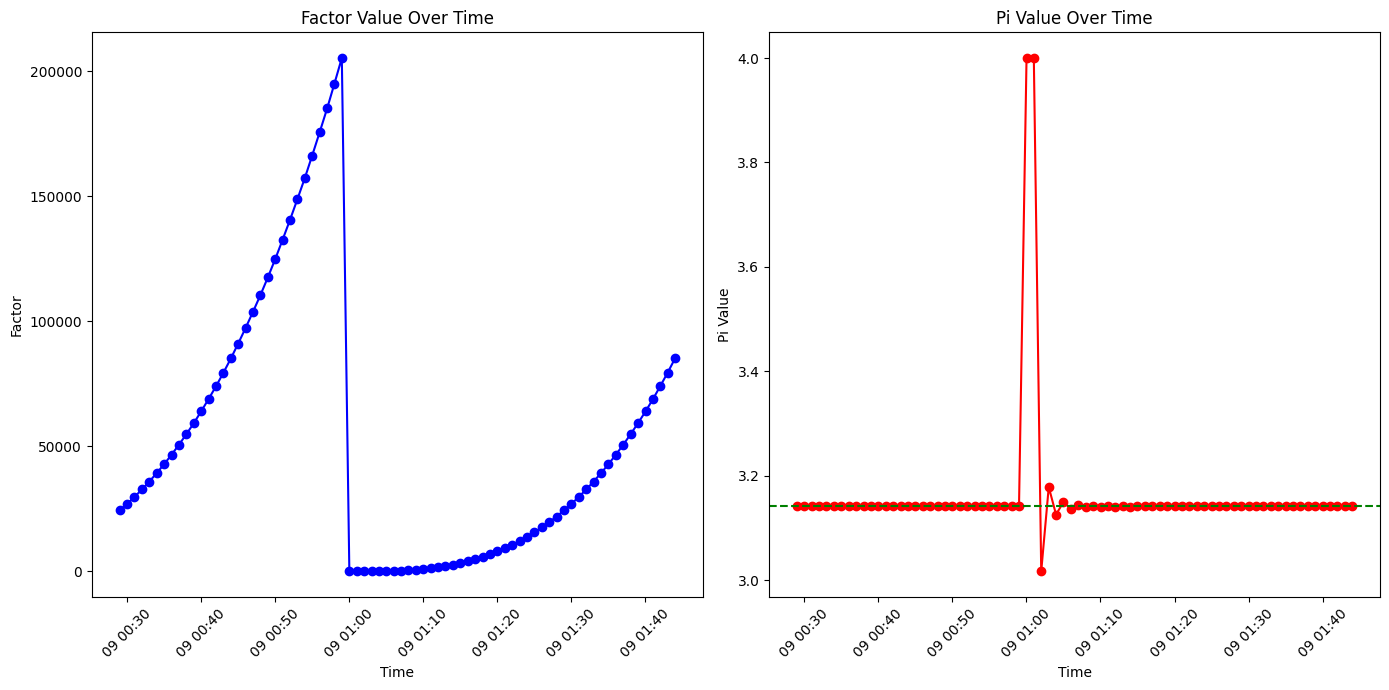

(              factor   pi_value
 count      76.000000  76.000000
 mean    51949.539474   3.162893
 std     54038.084167   0.139354
 min         1.000000   3.017072
 25%      6602.250000   3.141567
 50%     35937.000000   3.141598
 75%     75442.750000   3.141622
 max    205379.000000   4.000000,
 0.02524481111719706,
 DatetimeIndex(['2023-12-09 00:39:00', '2023-12-09 00:42:00',
                '2023-12-09 00:43:00', '2023-12-09 00:44:00',
                '2023-12-09 00:48:00', '2023-12-09 00:49:00',
                '2023-12-09 00:50:00', '2023-12-09 00:54:00',
                '2023-12-09 00:57:00', '2023-12-09 01:00:00',
                '2023-12-09 01:03:00', '2023-12-09 01:10:00',
                '2023-12-09 01:11:00', '2023-12-09 01:17:00',
                '2023-12-09 01:18:00', '2023-12-09 01:23:00',
                '2023-12-09 01:24:00', '2023-12-09 01:25:00',
                '2023-12-09 01:26:00', '2023-12-09 01:27:00',
                '2023-12-09 01:40:00', '2023-12-09 01:41:00'

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# time needs to be converted to datetime and set to index
pi_data_df['time'] = pd.to_datetime(pi_data_df['time'])
pi_data_df.set_index('time', inplace=True)

# use describe() for stat summary
stat_summ = pi_data_df[['factor', 'pi_value']].describe()

# plot factor and pivalue over time
plt.figure(figsize=(14, 7))
# FACTOR
plt.subplot(1, 2, 1)
plt.plot(pi_data_df.index, pi_data_df['factor'], marker='o', linestyle='-', color='blue')
plt.title('Factor Value Over Time')
plt.xlabel('Time')
plt.ylabel('Factor')
plt.xticks(rotation=45)
plt.tight_layout()
# PI VALUE
plt.subplot(1, 2, 2)
plt.plot(pi_data_df.index, pi_data_df['pi_value'], marker='o', linestyle='-', color='red')
plt.title('Pi Value Over Time')
plt.xlabel('Time')
plt.ylabel('Pi Value')
plt.axhline(y=3.14159, color='green', linestyle='--')  # Reference line for actual Pi value
plt.xticks(rotation=45)
plt.tight_layout()

#return plot
plt.show()
# MEAN-ABS DEVIATION
pi_data_df['pi_deviation'] = (pi_data_df['pi_value'] - 3.14159).abs()
mean_deviation = pi_data_df['pi_deviation'].mean()
# ERRORS AND MISSING POINT ANOMALIES
expected_time_points = pd.date_range(start=pi_data_df.index.min(), end=pi_data_df.index.max(), freq='T')
missing_time_points = expected_time_points.difference(pi_data_df.index)
# GET CORRELATION
correlation = pi_data_df[['factor', 'pi_value']].corr()
stat_summ, mean_deviation, missing_time_points, correlation


*The analysis and observations from data output:*

**Statistical Summary**

The factor column has a *mean* value of approximately 51949.54 and a *standard deviation* of about 54038.08 which suggests a wide variance in the factor values. Since the pi_value column has a *mean* of approximately 3.1629, which is significantly higher than the actual value of Pi (using 3.14159) and the *standard deviation* is about 0.1394, this indicates that there are some fluctuations in our pi_value. 

The *mean absolute deviation* from Pi value is 0.0252, which shows **on average** how much the pi_value deviates from the actual Pi value.


**Addressing Missing Time Points**
There are several missing time points where data was not recorded, particularly around the times 00:39, 00:42, 00:43, and so forth. This might indicate issues with data collection or the scheduled execution (important note: internet was spotty from time to time in my apartment building - I dont know if this could have an affect or not but just wanted to state it for the record)


**Correlation Analysis**
The correlation coefficient between factor and pi_value is approx -0.1489, showing a slight inverse relationship but this relationship is not very strong.


**Visual Analysis**
(What I can gather from teh plots/ graphs generated from the data)

The factor values seem to increase over time but not linearly there are some sharp increases and plateaus. The pi_value on the other hand fluctuates over time. After looking a bit more at it - it does not show a clear pattern, and there is a significant outlier at the maximum value of 4 which is significantly higher than pi when compared to our other results.


The factor value appears to increase as time progresses, but with an irregular pattern, possibly suggesting batch processing in the underlying process that generates this value. The pi_value has significant variations - and also show some outliers - which could indicate errors in the data or the process generating these values. (Again, could be an interuption with the fetch or when populating SQL DB)


- If the factor represents a computational step or iteration then its increase could be related to the workload of the fetch or population being executed over a longer period of time since were running the program over an hour.

- The variations in the pi_value Maybe this could be intentional to represent variance, especially since the data was fetched from a preset api - Maybe this api resets the value of pi and then gradually gets more accurate until a certain time then resets and goes back to the value of 4.